# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 32.5 MB/s eta 0:00:00


In [2]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

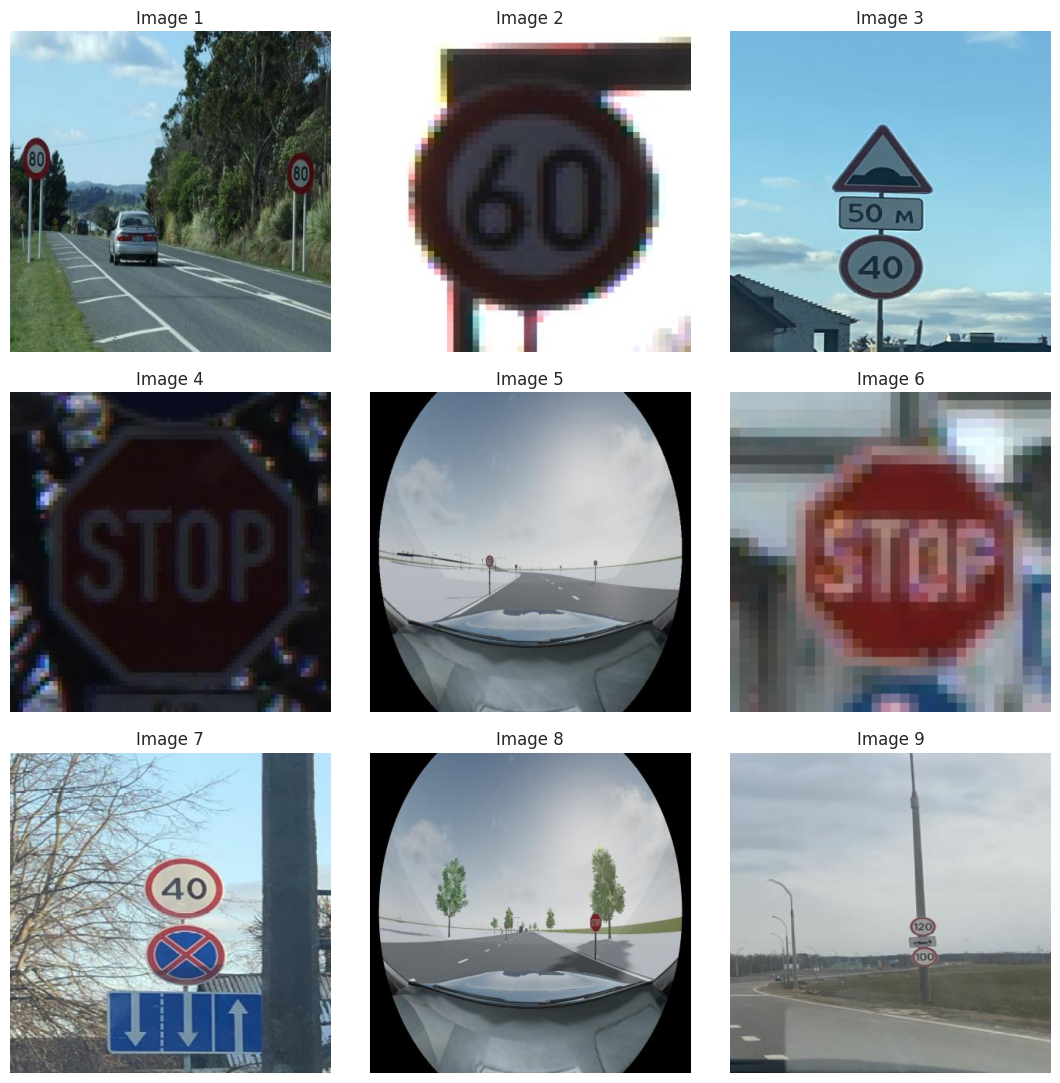

In [4]:
#visualizing training images
train_image_dir = '/kaggle/input/cardetection/car/train/images'
num_samples = 9
train_images = os.listdir(train_image_dir)
sample_images = random.sample(train_images,num_samples)
fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = sample_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(train_image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
image = cv2.imread("/kaggle/input/cardetection/car/train/images/00000_00000_00001_png.rf.56c1f101f790944f14f215c7cad2a2b8.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


In [6]:
# upgrades ultralytics and installs ray module
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 24.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.24.0
    Uninstalling ray-2.24.0:
      Successfully uninstalled ray-2.24.0


In [7]:
pip install wandb

Note: you may need to restart the kernel to use updated packages.


In [8]:
import wandb
wandb.login(key='14d06b7822be57a7ed05f97882ab39b6e7181bb8')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [9]:
model = YOLO('yolov8n.pt')
results_train = model.train(data="/kaggle/input/cardetection/car/data.yaml",epochs = 60, batch = -1, optimizer = 'auto')

100%|██████████| 6.25M/6.25M [00:00<00:00, 192MB/s]


Ultralytics 8.3.15 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/cardetection/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 38.3MB/s]
2024-10-18 09:12:44,513	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-18 09:12:44,762	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Currently logged in as: shahsoham45 (shahsoham45-veermata-jijabai-technological-institute). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 173MB/s]


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.10G reserved, 0.06G allocated, 14.58G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2693133       6.957         0.193         52.83         223.3        (1, 3, 640, 640)                    list
     2693133       13.91         0.319         26.52         58.63        (2, 3, 640, 640)                    list
     2693133       27.83         0.562         28.84         58.33        (4, 3, 640, 640)                    list
     2693133       55.66         1.030         30.77         61.51        (8, 3, 640, 640)                    list
     2693133       111.3         2.026         53.46         73.34       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 71 for CUDA:0 8.88G/14.74G (60%) ✅


train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:20<00:00, 174.10it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:05<00:00, 157.90it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005546875000000001), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.68G     0.8664      4.055      1.222        119        640: 100%|██████████| 50/50 [00:39<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.00s/it]

                   all        801        944     0.0654      0.475      0.103     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.57G     0.7483      3.083      1.117        102        640: 100%|██████████| 50/50 [00:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.671      0.169      0.222      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.57G     0.7499      2.532      1.099        114        640: 100%|██████████| 50/50 [00:37<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        801        944      0.422      0.439      0.369      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      9.63G     0.7296      2.146      1.079        122        640: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        801        944      0.481      0.514      0.529      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.63G      0.692      1.802      1.052        118        640: 100%|██████████| 50/50 [00:38<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        801        944      0.636      0.617      0.661      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.63G     0.6712      1.532      1.036        107        640: 100%|██████████| 50/50 [00:37<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.699      0.627      0.695      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.57G     0.6519      1.379      1.022        117        640: 100%|██████████| 50/50 [00:37<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        801        944      0.824      0.735      0.824      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       9.6G     0.6406      1.255      1.022         96        640: 100%|██████████| 50/50 [00:37<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        801        944      0.851      0.771      0.862      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       9.6G     0.6367      1.172      1.015        112        640: 100%|██████████| 50/50 [00:37<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.885      0.751      0.855       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.57G     0.6275      1.075      1.006        127        640: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        801        944      0.868      0.769      0.871      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.58G     0.6176      1.025      1.002         99        640: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.889      0.807      0.883      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.57G     0.5909     0.9538     0.9941        116        640: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        801        944      0.882      0.785      0.881       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      9.63G      0.604     0.9121     0.9946         98        640: 100%|██████████| 50/50 [00:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        801        944      0.871      0.817      0.888       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.58G     0.5878     0.8915       0.99        114        640: 100%|██████████| 50/50 [00:38<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.895      0.806      0.893      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.63G     0.5721     0.8523     0.9785         97        640: 100%|██████████| 50/50 [00:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        801        944      0.902      0.832      0.909      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      9.57G     0.5726     0.8308     0.9782        119        640: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.927      0.824      0.904      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.57G     0.5778     0.8006     0.9816        107        640: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        801        944       0.94      0.837      0.914      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      9.58G     0.5571     0.7771     0.9689        114        640: 100%|██████████| 50/50 [00:36<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]

                   all        801        944      0.945       0.85      0.926      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.63G     0.5624     0.7668     0.9792         86        640: 100%|██████████| 50/50 [00:37<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.938      0.836      0.925       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      9.58G     0.5512     0.7328      0.968        112        640: 100%|██████████| 50/50 [00:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        801        944      0.935      0.852      0.929      0.792


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.56G     0.5495     0.5826     0.9409         62        640: 100%|██████████| 50/50 [00:38<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        801        944       0.94      0.846      0.921      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      9.52G     0.5417     0.5454     0.9394         65        640: 100%|██████████| 50/50 [00:35<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.936      0.885      0.941      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.56G     0.5332     0.5141      0.931         58        640: 100%|██████████| 50/50 [00:34<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        801        944      0.939      0.871      0.941      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.52G     0.5264     0.4952     0.9249         66        640: 100%|██████████| 50/50 [00:35<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        801        944       0.95       0.88      0.944       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      9.63G      0.519      0.474     0.9259         65        640: 100%|██████████| 50/50 [00:35<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.948      0.885      0.941      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      9.56G     0.5115     0.4575     0.9184         59        640: 100%|██████████| 50/50 [00:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.953      0.882      0.946      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.52G     0.5073     0.4497     0.9175         66        640: 100%|██████████| 50/50 [00:35<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.959      0.903      0.951      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      9.56G     0.4962     0.4337     0.9101         67        640: 100%|██████████| 50/50 [00:35<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.946      0.899       0.95      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      9.52G     0.4908     0.4233     0.9017         66        640: 100%|██████████| 50/50 [00:35<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.959      0.899      0.952      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      9.52G     0.4848     0.4126     0.9021         67        640: 100%|██████████| 50/50 [00:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.957      0.897      0.954      0.821



30 epochs completed in 0.360 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.15 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,687,293 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.32s/it]


                   all        801        944      0.959      0.899      0.952      0.823
           Green Light         87        122      0.893      0.705      0.841        0.5
             Red Light         74        108      0.876      0.782      0.816      0.494
       Speed Limit 100         52         52      0.933      0.942      0.987      0.889
       Speed Limit 110         17         17          1      0.936      0.954      0.875
       Speed Limit 120         60         60          1      0.916      0.989      0.909
        Speed Limit 20         56         56      0.973      0.982      0.985      0.867
        Speed Limit 30         71         74      0.947      0.959      0.978      0.922
        Speed Limit 40         53         55      0.975      0.945      0.992      0.889
        Speed Limit 50         68         71      0.974      0.887      0.946      0.842
        Speed Limit 60         76         76      0.958      0.893      0.949      0.872
        Speed Limit 7

In [10]:
results_train = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
results_train.tail(10)

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21   924.648         0.54950         0.58258         0.94093   
21     22   966.744         0.54165         0.54538         0.93940   
22     23  1007.450         0.53323         0.51407         0.93096   
23     24  1049.120         0.52642         0.49517         0.92490   
24     25  1090.300         0.51902         0.47404         0.92588   
25     26  1131.270         0.51148         0.45749         0.91839   
26     27  1172.690         0.50728         0.44972         0.91750   
27     28  1214.350         0.49617         0.43367         0.91014   
28     29  1255.620         0.49075         0.42334         0.90172   
29     30  1296.570         0.48481         0.41261         0.90210   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.93991            0.84589           0.92117   
21               0.93650            0.88525           0.94145   
22               0.93897            0.87140           0.94148   
23               0.94955            0.87966           0.94352   
24               0.94768            0.88537           0.94054   
25               0.95329            0.88247           0.94636   
26               0.95892            0.90291           0.95063   
27               0.94624            0.89920           0.95004   
28               0.95894            0.89875           0.95224   
29               0.95703            0.89721           0.95356   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.78620       0.59595       0.51241       0.95594  0.000179   
21              0.80429       0.58418       0.45833       0.95346  0.000161   
22              0.80494       0.59454       0.44803       0.95665  0.000144   
23              0.80969       0.58008       0.42251       0.94554  0.000127   
24              0.81055       0.57052       0.42730       0.93908  0.000109   
25              0.81381       0.56585       0.41109       0.93485  0.000092   
26              0.81806       0.57309       0.39747       0.94419  0.000075   
27              0.81832       0.56769       0.40229       0.93520  0.000057   
28              0.82260       0.56700       0.38479       0.93789  0.000040   
29              0.82139       0.55923       0.38488       0.93208  0.000023   

      lr/pg1    lr/pg2  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

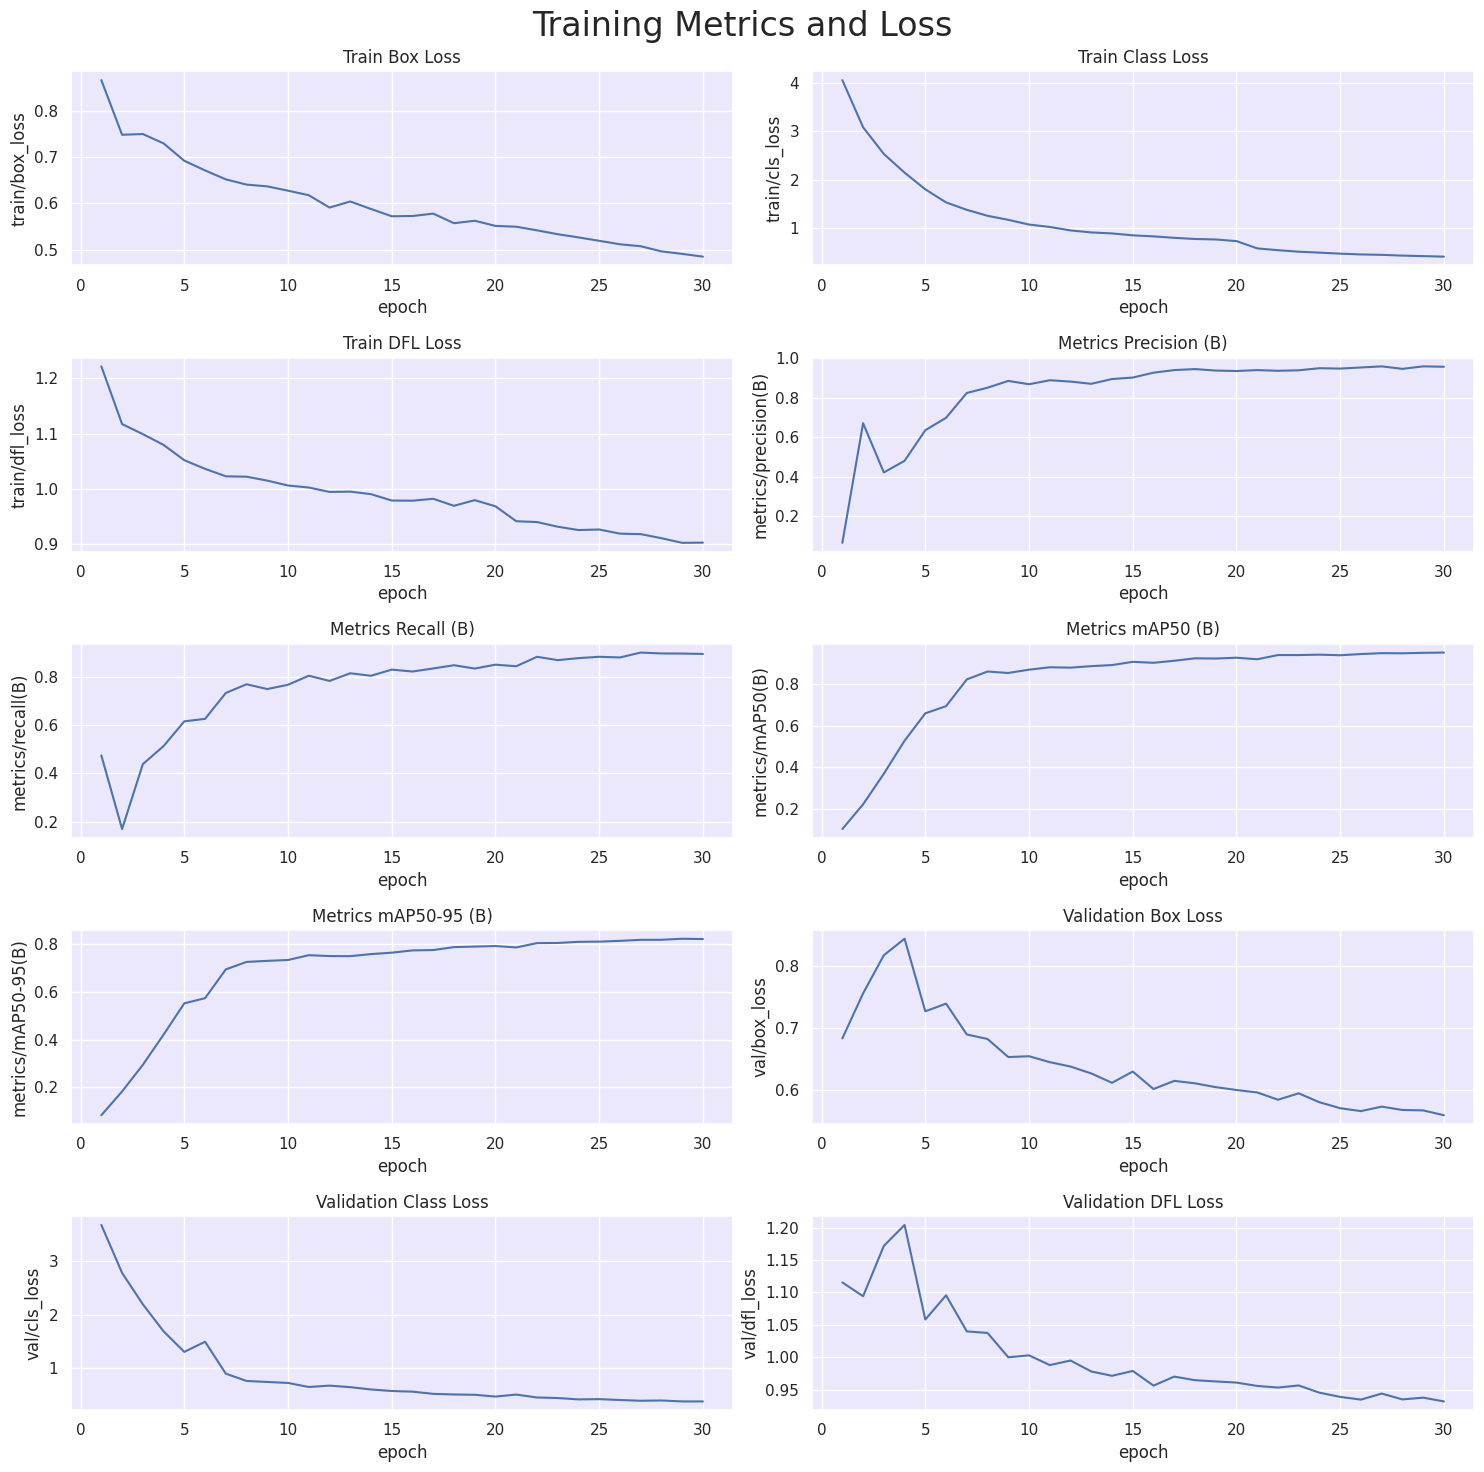

In [11]:
# Read the results.csv file as a pandas dataframe
results_train.columns = results_train.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=results_train, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=results_train, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=results_train, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=results_train, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=results_train, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=results_train, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=results_train, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=results_train, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=results_train, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=results_train, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [12]:
# Loading the best performing model
final_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = final_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.15 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,687,293 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 731.39it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  5.93it/s]


                   all        801        944      0.959      0.899      0.952      0.824
           Green Light         87        122       0.89      0.705      0.842      0.497
             Red Light         74        108      0.876      0.783       0.82      0.497
       Speed Limit 100         52         52      0.933      0.942      0.987       0.88
       Speed Limit 110         17         17          1      0.937      0.954      0.882
       Speed Limit 120         60         60          1      0.916      0.989      0.914
        Speed Limit 20         56         56      0.973      0.982      0.985      0.866
        Speed Limit 30         71         74      0.947      0.959      0.978      0.922
        Speed Limit 40         53         55      0.975      0.945      0.992      0.886
        Speed Limit 50         68         71      0.974      0.887      0.946      0.844
        Speed Limit 60         76         76      0.958      0.893      0.949      0.875
        Speed Limit 7


0: 640x640 1 Speed Limit 50, 1 Speed Limit 80, 7.2ms
Speed: 2.5ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 7.2ms
Speed: 2.2ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.3ms
Speed: 2.4ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.2ms
Speed: 2.1ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 80, 7.6ms
Speed: 1.7ms preprocess, 

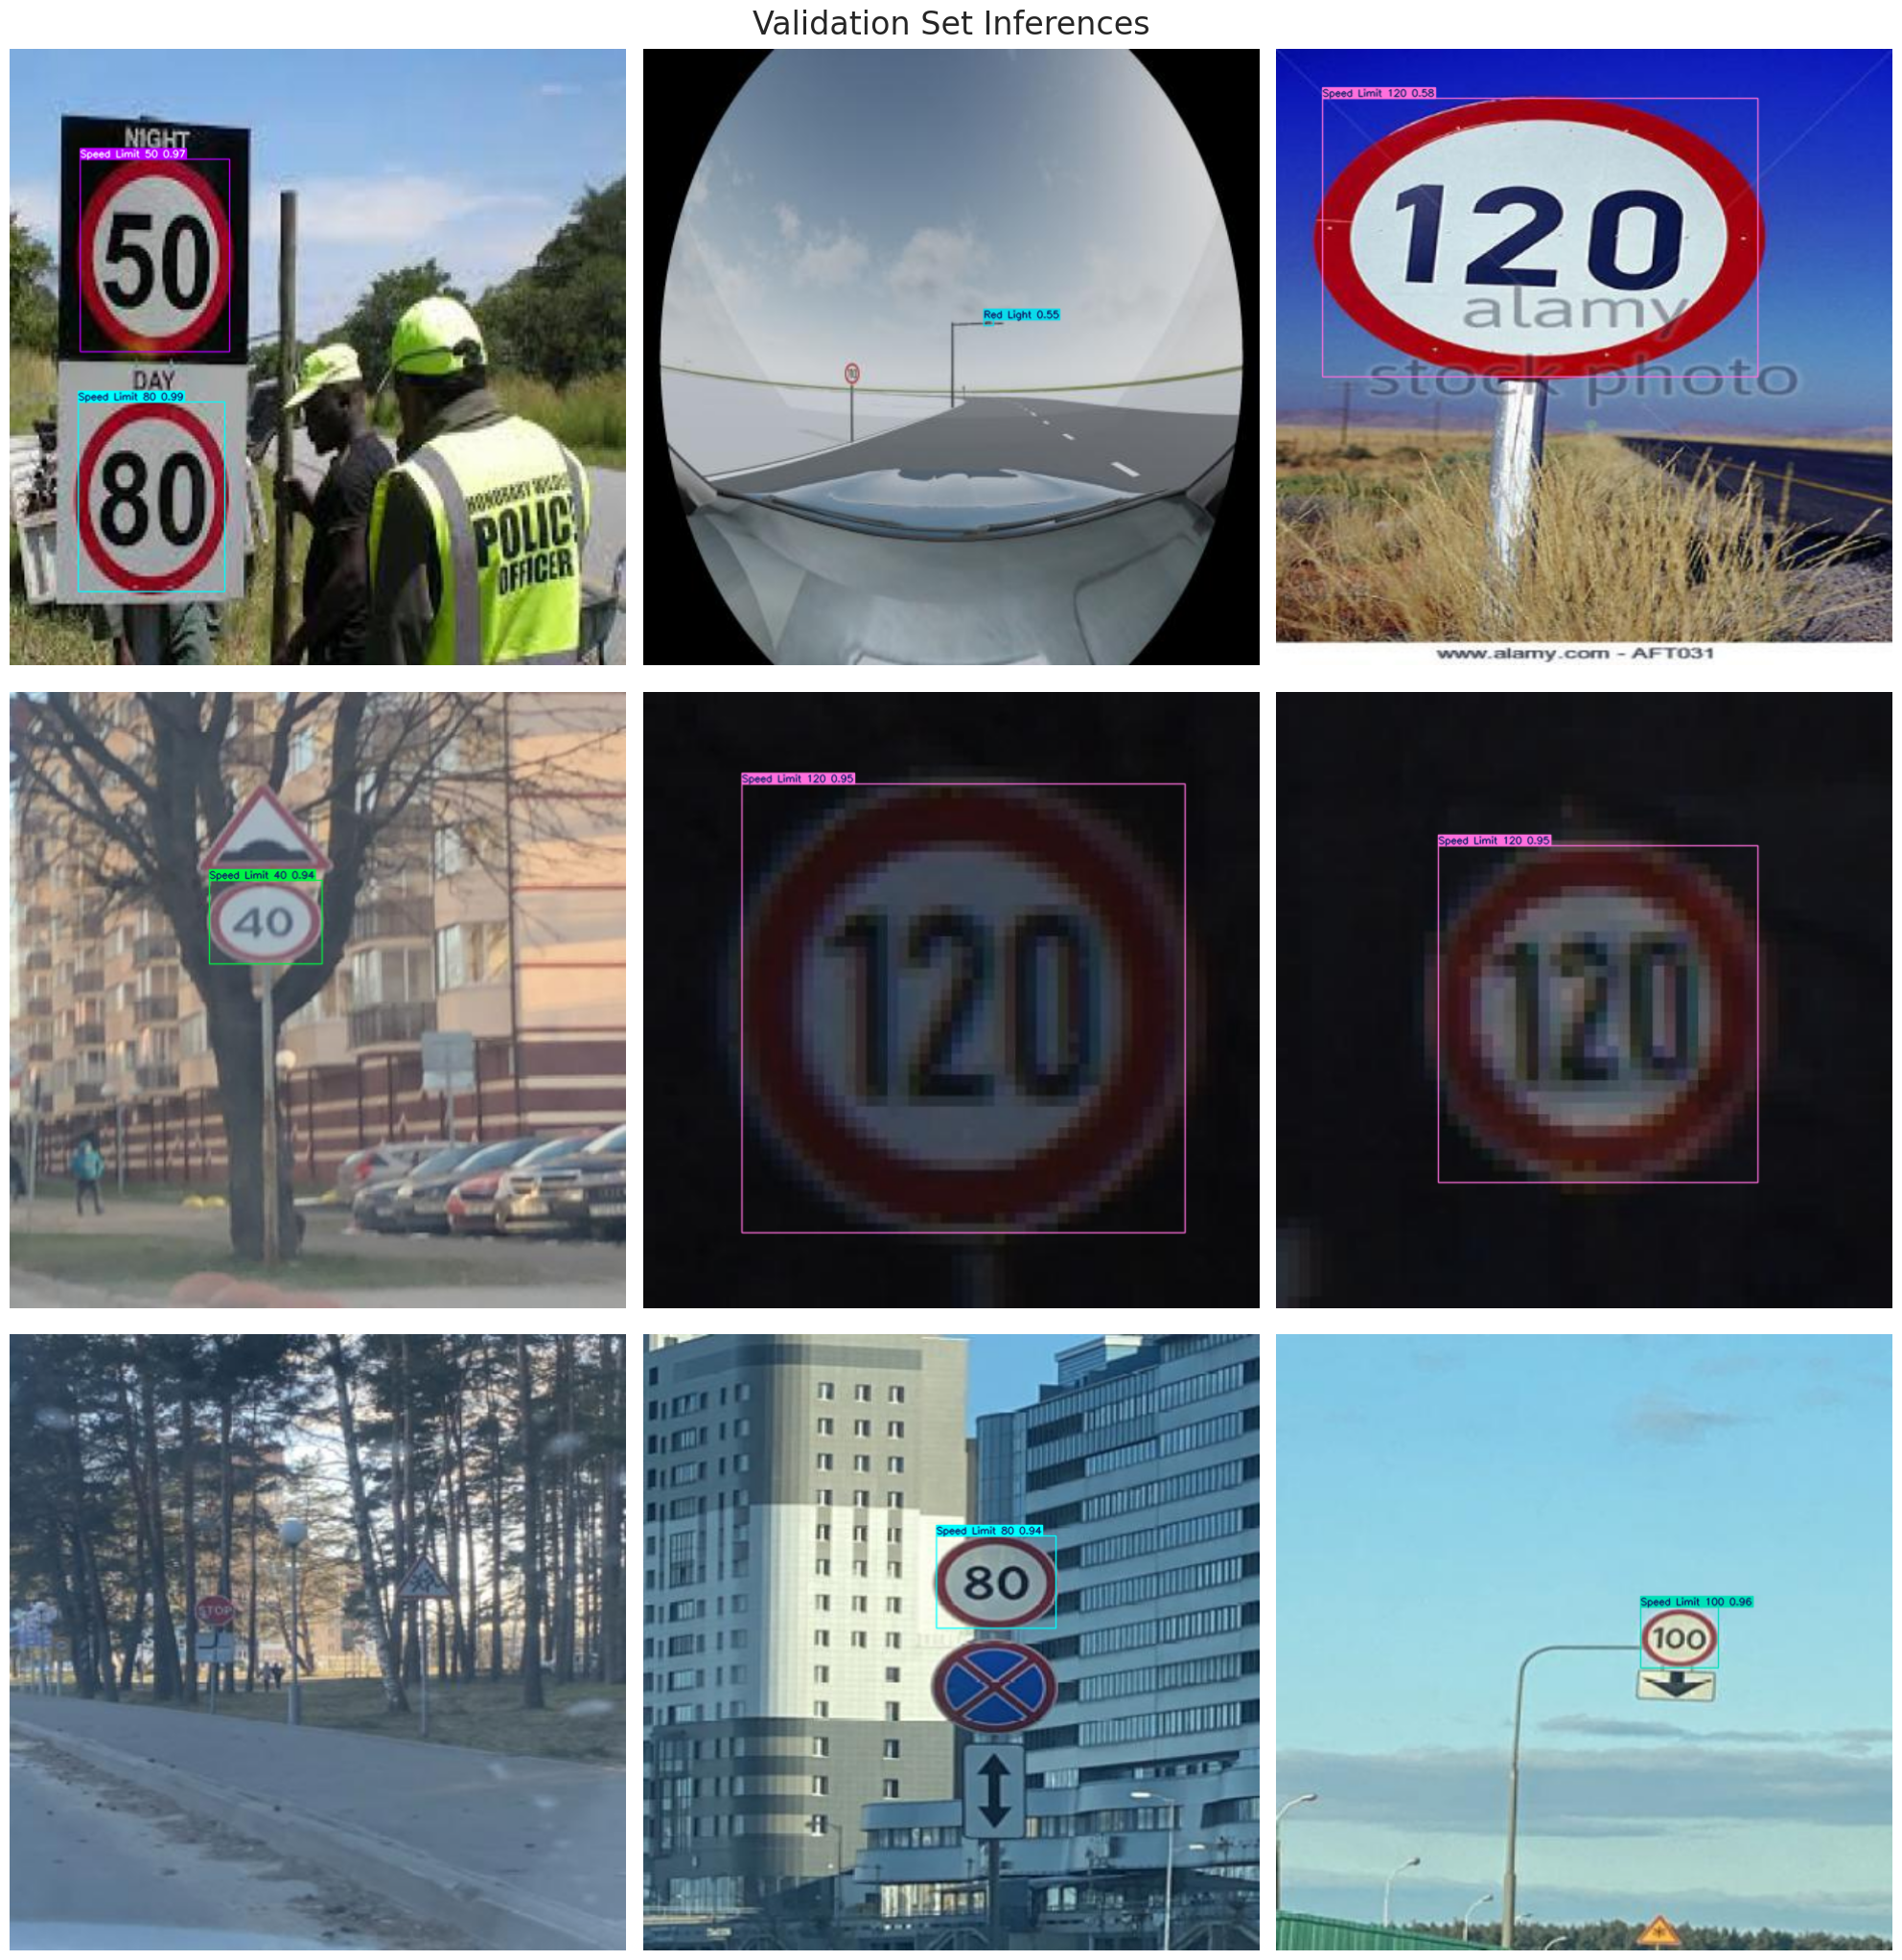

In [13]:
def normalization(image):
    return image/ 255.0

def resizing(image,size=(640,640)):
    return cv2.resize(image,size)

validation_images_path = '/kaggle/input/cardetection/car/test/images'
image_files = [file for file in os.listdir(validation_images_path) if file.endswith('.jpg')]
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(validation_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resizing(image, size=(640, 640))
                # Normalize image
                normalized_image = normalization(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = final_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from tqdm.notebook import tqdm

def normalization(image):
    return image / 255.0

def resizing(image, size=(640, 640)):
    return cv2.resize(image, size)

def process_video(video_path, model, max_frames=None, display_frequency=10):
    cap = cv2.VideoCapture(video_path)
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    if max_frames is None or max_frames > total_frames:
        max_frames = total_frames
    
    # Create a figure for displaying the video
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.close()  # Prevent the empty figure from displaying
    
    # Create a progress bar
    pbar = tqdm(total=max_frames, desc="Processing video")
    
    frame_count = 0
    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Resize frame
        resized_frame = resizing(frame, size=(640, 640))
        
        # Normalize frame
        normalized_frame = normalization(resized_frame)
        
        # Convert the normalized frame to uint8 data type
        normalized_frame_uint8 = (normalized_frame * 255).astype(np.uint8)
        
        # Predict with the model
        results = model.predict(source=normalized_frame_uint8, imgsz=640, conf=0.5, show=False, save=False)
        
        # Convert BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display the frame at specified frequency
        if frame_count % display_frequency == 0:
            clear_output(wait=True)
            ax.clear()
            ax.imshow(frame_rgb)
            
            # Plot bounding boxes
            for box in results[0].boxes.xyxy:
                x1, y1, x2, y2 = box.tolist()
                rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='red', linewidth=2)
                ax.add_patch(rect)
            
            ax.axis('off')
            ax.set_title(f"Frame {frame_count}/{max_frames}")
            display(fig)
        
        frame_count += 1
        pbar.update(1)
    
    cap.release()
    pbar.close()
    plt.close(fig)

# Example usage
video_path = '/kaggle/input/traffic-light-video/Traffic Light 2.mp4'
process_video(video_path, final_model, max_frames=10000, display_frequency=10)

NameError: name 'final_model' is not defined